In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from google.colab import files

# OBJETIVOS

O objetivo dessa atividade é tentar prever necessidades de consumidores baseados em características das casas desses consumidores. Para alcançar este objetivo, iremos realizar a previsão usando regressão linear.

Resumo dos dados:

*   Isolamento: nível de isolamento térmico da casa em uma taxa de 1 a 10, sendo que 10 indica a máxima espessura do isolamento.
*  Temperatura: temperatura ambiente externa média em cada casa no último ano. As medidas estão em graus Fahrenheit.
*   Num_ocupantes: número total de pessoas vivendo na casa.
*   Idade_media: idade média dos ocupantes da casa.
*   Tamanho_casa: tamanho da casa em uma taxa variando de 1 a 8. Quanto maior o valor, maior a casa.
*   Aquecimento_oleo: número total de unidades de aquecedores à óleo compradas pelo proprietário da casa no último ano. Esse é o valor a ser estimado.













In [ ]:
# Lendo o arquivo em .xlsx
uploaded = files.upload()
base = pd.read_excel("bases_regressao.xlsx", sheet_name = 'BASE' ) 
base.head(2)

TypeError: ignored

In [ ]:
previsao = pd.read_excel("bases_regressao.xlsx", sheet_name = 'PREVISAO' ) 
previsao.head(2)

,Isolamento,Temperatura,Num_ocupantes,Idade_media,Tamanho_casa
0,5,69,10,70.1,7
1,5,80,1,66.7,1


# PREPARAÇÃO DOS DADOS

Esta atividade irá precisar da base de dados: **bases_regressao.xlsx **

Carregue ambas as bases de dados do arquivo Atividade 5 - **Bases.xlsx.** A planilha chamada Bases possui 1219 registros e contém a coluna Aquecimento_oleo, que será utilizada na fase de treinamento. A planilha PREVISAO contém 42651 registros de perfis de casas, mas não possui a coluna **Aquecimento_oleo,** que deverá ser estimada pelo modelo de regressão.

Note que os atributos possuem aproximadamente a mesma faixa de valores, com exceção da idade média dos ocupantes, cuja faixa de valores é mais ampla na base de previsão que na base de treinamento. Apesar de podermos acreditar que, provavelmente, essa ligeira diferença na fixa de valores de idade não irá produzir valores imprecisos, a REGRESSÃO LINEAR não pode ser usada para esses casos. Por isso vamos precisar remover esses registros fora da faixa.

In [ ]:
print("Numero de atributos da base de Treinamento e Teste:")
print(base.shape)
print("Numero de atributos da base de previsão:")
print(previsao.shape)

Numero de atributos da base de Treinamento e Teste:
(1218, 6)
Numero de atributos da base de previsão:
(42650, 5)


In [ ]:
base.describe()

,Isolamento,Temperatura,Num_ocupantes,Idade_media,Tamanho_casa,Aquecimento_oleo
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,6.214286,65.078818,3.113300,42.706404,4.649425,197.394089
std,2.768094,16.932425,1.690605,15.051137,2.321226,56.248267
min,2.000000,38.000000,1.000000,15.100000,1.000000,114.000000
25%,4.000000,49.000000,2.000000,29.700000,3.000000,148.250000
50%,6.000000,60.000000,3.000000,42.900000,5.000000,185.000000
75%,9.000000,81.000000,4.000000,55.600000,7.000000,253.000000
max,10.000000,90.000000,10.000000,72.200000,8.000000,301.000000


In [ ]:
#Separação de dados para Treinamento e Teste
X = base.iloc[:,0:5]
y = base.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15) 

# EXERCÍCIOS

Execute a regressão linear. Baseado nos dados do modelo de Linear Regression interprete o significado dos pesos encontrado e responda às seguintes questões:




In [ ]:
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("Regressão Linear (original)")
print(f"Coeficiente R^2 na base de treinamento:",np.round(lr.score(X_train, y_train),2))
print(f"Número de atributos usados:", np.sum(lr.coef_ != 0))
print('Rank', lr.rank_)

print("Descrição do modelo: ")
s = [np.round(v,2) for v in lr.coef_]
print(f"w:", s , f"b:", np.round(lr.intercept_,2))

Regressão Linear (original)
Coeficiente R^2 na base de treinamento: 0.82
Número de atributos usados: 5
Rank 5
Descrição do modelo: 
w: [3.69, -0.88, -0.18, 1.91, 3.21] b: 135.43


## 1. Quais os atributos mais relevantes?  

* Os atributos mais relevantes, considerando todos os pressupostos da regressão linear atendidos, são ordenados conforme o valore do coeficiente em modulo. Ele expressa o efeito marginal ou ganho singular no valor predito.

* Todos os 5 atributos foram utilizados. A ordenação pelo grau de importância é a seguinte: Isolamento, Tamanho_casa, Idade_media, Temperatura e numero_ocupantes . Para uma análise posterior faz-se necessário verificar o signicância dos parâmetros; 



In [ ]:
var_names = np.array(base.columns)
list(zip(var_names ,np.abs(s)))

[('Isolamento', 3.69),
 ('Temperatura', 0.88),
 ('Num_ocupantes', 0.18),
 ('Idade_media', 1.91),
 ('Tamanho_casa', 3.21)]

## 2.  São diretamente relacionados ou inversamente relacionados?

* Análisando os sinais dos coeficientes as variáveis Isolamento, Idade_media e Tamanho_Casa são relacionados com o aquecimento_do_oleo. Já o num_ocupantes e Temperatura são inversamente relacionados com o aquecimento_do_oleo. Os atributos explicativos devem ser independentes entre si, para evitar colinearidade. No caso de existência, estas devem ser transformadas e o modelo reajustado. Não avancei nessas análises por causa de tempo professor.   



## 3.   Qual atributo não foi significativo para a construção do modelo?

* Para verificar a significância entre dos parâmetros eu teria que fazer todos os testes e transformações necessárias nos dados para atender os pressupostos da regressão linear e depois avaliar pelo teste t a significância de cada coeficiente ajustado. Provavelmente o comando rank_ faz algum teste de significância nos parâmetros e assumindo isso **TODOS OS COEFICIENTES FORAM SIGNIFICATIVOS.**

## 4.   Suponha que se deseja prever o estoque de óleo necessário para o próximo ano. Utilizando a planilha PREVISÃO, encontre quantos óleo será necessário para suprir todos os domicílios (probabilidade de venda).


 count    1218.000000
mean       42.706404
std        15.051137
min        15.100000
25%        29.700000
50%        42.900000
75%        55.600000
max        72.200000
Name: Idade_media, dtype: float64


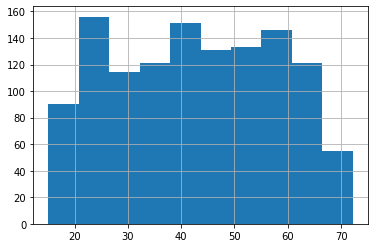

In [ ]:
# descritiva para a variável idade na base de ajuste do modelo
print(f'\n',base['Idade_media'].describe())
base['Idade_media'].hist();


 count    1335.000000
mean       71.627940
std         0.549627
min        70.700000
25%        71.200000
50%        71.600000
75%        72.100000
max        72.500000
Name: Idade_media, dtype: float64


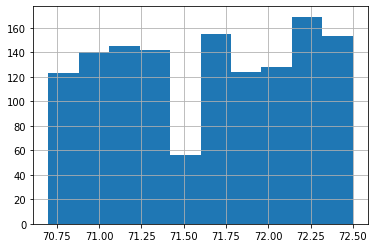

In [ ]:
# descritiva da variável idade na base de ajuste do modelo
print(f'\n',previsao['Idade_media'].describe())
previsao['Idade_media'].hist();

In [ ]:
#Retirando os valores de previsão fora da faixa da base de dados de modelagem
max=base['Idade_media'].max() 
previsao = previsao.loc[(previsao['Idade_media']< max)]
previsao.describe()

,Isolamento,Temperatura,Num_ocupantes,Idade_media,Tamanho_casa
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,6.006910,64.619941,5.582428,71.398717,4.492596
std,2.613236,14.989676,2.775594,0.419637,2.392180
min,2.000000,38.000000,1.000000,70.700000,1.000000
25%,4.000000,52.000000,3.000000,71.000000,2.000000
50%,6.000000,65.000000,6.000000,71.400000,4.000000
75%,8.000000,78.000000,8.000000,71.700000,7.000000
max,10.000000,90.000000,10.000000,72.100000,8.000000


In [ ]:
y_estimado = lr.predict(previsao)    # para o próximo ano

In [ ]:
print(f'O quantidade total de óleo previsto para o ano que vem é :', np.round(y_estimado.sum(),2)) 

O quantidade total de óleo previsto para o ano que vem é : 253758.73
